In [1]:
import requests
import pandas as pd
import numpy as np
import json
import csv
import itertools
import sys
import config
from config import client_id
import time
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
#CSV path, in this case for SPY
csv_file1 = "C:/Users/Martin/Trading/data_MES"

#Second CSV path, IVV 
csv_file2 = "C:/Users/Martin/Trading/data_ES"  



In [3]:
#takes in two file paths and returns transposed pandas dataframes

def get_DataFrames(filePath1, filePath2):
    df1 = pd.read_csv(filePath1)
    df1= df1.transpose()
    
    df2 = pd.read_csv(filePath2)
    df2= df2.transpose()
    
    return df1, df2
    
    

In [4]:
def run_equality_test(df1, df2, colnum):
    #pass in two dataframes to compare
    #pass in the column to compare them on
    
    #algo description:
    #create a list when the two values are equal
    #when they are not equal add the absolute value of the differnce to the list
    #when they converge back to equal end adding
    #add full convergence size to convergence list
    
    
    df1tester = df1[colnum]
    df2tester = df2[colnum]

    #create lists of the values for easier interations.
    tester_1 = []
    tester_2 = []



    for i in df1tester[1:]:
            i = float(i)
            tester_1.append(round(i,2))

    for i in df2tester[1:]:
            i = float(i)
            tester_2.append(round(i,2))
            
    #To avoid error, iterate through the smaller list
    divergence_maxes = []
    
    divergence_helper = []
    if(len(tester_1) > len(tester_2)):
        for i in range(len(tester_2)):
            if (tester_1[i] == tester_2[i]):
                temp_max = 0
                for i in range(len(divergence_helper)):
                    if(divergence_helper[i] > temp_max):
                        temp_max = divergence_helper[i]
                
                if(temp_max >0):
                    divergence_maxes.append(temp_max)
                
                
                divergence_helper = []
            else:
                divergence_helper.append(abs(tester_1[i] - tester_2[i]))
    else:
        for i in range(len(tester_1)):
            if (tester_1[i] == tester_2[i]):
                temp_max = 0
                for i in range(len(divergence_helper)):
                    if(divergence_helper[i] > temp_max):
                        temp_max = divergence_helper[i]
                
                if(temp_max >0):
                    divergence_maxes.append(temp_max)
                
                
                divergence_helper = []
            else:
                divergence_helper.append(abs(tester_1[i] - tester_2[i]))
                
    return divergence_maxes

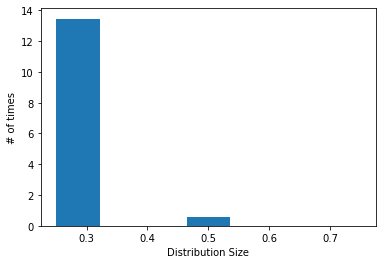

In [9]:
if __name__=="__main__":
    df1, df2 = get_DataFrames(csv_file1, csv_file2)
    #Run test for net percent change = 43
    #for futures, last price = 5
    divergences = run_equality_test(df1, df2, 5)
    
    total_num_divergences = 0
    sum_of_divergences = 0
    greatest_divergence = 0
    #Threshold = ..02%
    num_above_threshold = 0
    for i in range(len(divergences)):
        total_num_divergences +=1
        sum_of_divergences += divergences[i]
        if(divergences[i] > greatest_divergence):
            greatest_divergence = divergences[i]
        if(divergences[i] > 1):
            num_above_threshold +=1
            
    plt.hist(divergences,density = True, bins = 7)
    plt.ylabel("# of times")
    plt.xlabel("Distribution Size")
    plt.show()
    
     

In [6]:
tempdf = pd.read_csv("C:/Users/Martin/Trading/data_MES")
tempdf = tempdf.transpose()

In [8]:
tempdf.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Unnamed: 0,assetType,assetMainType,symbol,bidPriceInDouble,askPriceInDouble,lastPriceInDouble,bidSizeInLong,askSizeInLong,bidId,askId,...,product,futurePriceFormat,futureTradingHours,futureIsTradable,futureMultiplier,futureIsActive,futureSettlementPrice,futureActiveSymbol,futureExpirationDate,delayed
0,FUTURE,FUTURE,/MES,3271.5,3272.0,3271.75,21,37,?,?,...,/MES,"D,D",GLBX(0=-1700151515301600),True,5.0,True,3264.75,/MESZ20,1608267600000,False
1,FUTURE,FUTURE,/MES,3272.0,3272.25,3272.0,11,19,?,?,...,/MES,"D,D",GLBX(0=-1700151515301600),True,5.0,True,3264.75,/MESZ20,1608267600000,False
2,FUTURE,FUTURE,/MES,3273.0,3273.25,3273.0,15,14,?,?,...,/MES,"D,D",GLBX(0=-1700151515301600),True,5.0,True,3264.75,/MESZ20,1608267600000,False
3,FUTURE,FUTURE,/MES,3273.0,3273.25,3273.0,9,16,?,?,...,/MES,"D,D",GLBX(0=-1700151515301600),True,5.0,True,3264.75,/MESZ20,1608267600000,False


In [10]:
#Start of Test Blocks
print(total_num_divergences)
print (greatest_divergence)
print(sum_of_divergences)
print(sum_of_divergences/total_num_divergences)
print(num_above_threshold) 

8793
0.75
2284.5
0.2598089389286933
0
